# Understanding Greenhouse Gas Trends: A Temporal Analysis of UK Emissions (2005-2022)

**GEOG5302 Assessment 2: Data Science Mini Project**

**201530247**

# Introduction

Greenhouse gas emissions are a significant driver of climate change, contributing to rising temperatures and environmental instability (IPCC, 2021). In the UK, emissions have evolved over time due to policy implementations, technological advancements, and more. However, unforeseen and unpredictable events have introduced sudden distruption, which highlights important questions about their long-term impacts on emission patterns.

This project investigates greenhouse gas emission trends in the UK through a temporal analysis spanning 2005 to 2022, with a focus on how COVID-19 impacted national emissions. It begins with a look into the background of the topic, using literature contextualize existing research. Next, the emissions dataset is introduced, cleaned, and preprocessed to ensure accuracy and consistency. The analysis applies various time series techniques, including Simple Moving Averages, Simple Exponential Smoothing, Double Exponential Smoothing, and Interrupted Time Series, to assess emission patterns and detect significant shifts. Finally, the project concludes with an interpretation of the findings, discussion of key insights, and evaluation of future implications and limitations.

# Background



Greenhouse gas emissions have been a key part of climate policy, with the UK making significant progress in reducing emissions over the past thirty years. Government initiatives, like the Climate Change Act 2008 and the net-zero by 2050 commitment have driven substantial emission reductions over time (GOV.UK, 2023). However, despite these overall reductions, sectors such as transportation and industry continue to create challenges for climate goals (Carbon Brief, 2023). Understanding the future trends of greenhouse gas emissions is vital in ensuring that these decreases in emissions remain consistent and sustainable.

During the shock of the COVID-19 pandemic, the suspension of transportation and most industrial activities led to an unexpected reduction in greenhouse gas emissions compared to the pre-pandemic period (Ukhurebor et al., 2022). Quere et al. (2020) found that as a result of the lockdowns, global CO2 emissions dropped by 8.8% in the first half of 2020. Similarly, ONS (2021) found that there was a 10% decrease in UK household greenhouse gas emissions in 2020. While these reductions were significant, many studies suggest that more data is needed beyond 2020 to determine whether these changes were temporary or indicative of a long-term structural shift (Smith et al., 2021; Ukhureboro et al., 2022).

A report by UK Parliament's House of Commons Library (2021) shows that greenhouse gas emissions from transport fell by 20% in 2020 in the UK, making it one of the most affected sectors. Flights and road transport made up most of this decrease, with commuting patterns significantly altered due to policies for working from home and a lack of commercial flights (House of Commons Library, 2021). As restrictions eased, however, sectors which were impacted most showed signs of rebounding. As found by the UK's Department for Energy Security and Net Zero (2022), vehicle travel and freight transport began to return to pre-pandemic levels by 2021 and 2022. Understanding the post-pandemic trend of emissions is crucial for designing climate policies for the future.



# Research Questions



1.   Can future UK greenhouse gas emissions be predicted using time series analysis?
2.  Which sector's emissions were most impacted by COVID-19?
3.   Did COVID-19 lead to lasting changes in greenhouse gas emissions for the most impacted sector?





# Data

The chosen dataset for this project is the 'UK greenhouse gas emissions: local authority and regional' dataset, sourced from the UK government and published by Department for Energy Security and Net Zero. It is classified as Accredited Official Statistics, meaning it complies with the Office for Statistisc Regulation's standards for credibility and accuracy. It contains greenhouse gas emission estimates by sector for each local authority in the UK, covering years 2005 to 2022.

This data provides a comprehensive view of UK greenhouse gas emissions, which makes it very well-suited for answering this project's research questions. It covers a long time span, which allows for future predictions, and provides detailed sectoral emissions data. Longitudinal data also allows for an assessment of COVID-19's impact, supporting Interrupted Time Series analysis.

https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/local_authority_carbon_dioxide_emissions

# Statistics and Visualisation

## Data Description

First we will import all of the modules needed for this project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
pd.options.mode.chained_assignment = None

import datetime
from datetime import datetime
import scipy, pylab

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


**GHG Emissions Data**

In [2]:
emissions = pd.read_csv('2005-2022-local-authority-ghg-emissions-csv-dataset.csv')

In [3]:
emissions.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.678178,1.678178,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.052700,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006770,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.311375,0.311375,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.010500,0.000000,90.457,98.3466


The emissions dataset contains 533016 rows and 15 columns. It has a multi-level geographic structure combined with emissions data over time.


*   **Country**: Name of the country
*   **Country code**: Unique country code
*   **Region**: Geographical region
*   **Region Code**: Unique region code
*   **Second Tier Authority**: Higher-level administrative authority

*   **Local Authority**: Specific local governing body
*   **Local Authority Code**: Unique local authority code
*   **Calendar Year**: Year of the emissions record
*   **LA GHG Sector**: Sector emissions by local authority
*   **LA GHG Sub-sector**: More detailed sector emission categories
*   **Greenhouse Gas**: Type of greenhouse gas recorded (CO2, CH4, N2O)
*   **Territorial emissions (kt CO2e)**: Total emissions in kilotonnes of CO2 equivalent
*   **CO2 emissions within the scope of influence of LAs (kt CO2)**: CO2 emissions controlled by local authorities
*   **Mid-year Population (thousands)**: Estimated population for the year
*   **Area (km2)**: Geographic area of the region in square kilometres









In [4]:
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533016 entries, 0 to 533015
Data columns (total 15 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Country                                                      533016 non-null  object 
 1   Country Code                                                 532602 non-null  object 
 2   Region                                                       533016 non-null  object 
 3   Region Code                                                  532602 non-null  object 
 4   Second Tier Authority                                        532602 non-null  object 
 5   Local Authority                                              533016 non-null  object 
 6   Local Authority Code                                         533016 non-null  object 
 7   Calendar Year                                                5330

The emissions data is made up of objects and floats. 'Country', 'Country Code', 'Region', 'Region Code', 'Second Tier Authority', 'Local Authority', 'Local Authority Code', 'LA GHG Sector', 'LA GHG Sub-sector' are all objects. The remaining columns, 'Calendar Year', 'Territorial Emissions (kt CO2e)', 'Mid-year Population (thousands)', 'Area (km2)', and 'CO2 emissions within the scope of influence of LAs (kt CO2)' are floats.

In [5]:
emissions.describe()

,Calendar Year,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
count,533016.000000,533016.000000,533016.000000,532602.000000,532602.000000
mean,2013.485747,17.121331,12.005353,179.277772,693.698270
std,5.194708,96.961376,49.060174,121.127481,1738.087974
min,2005.000000,-2854.921188,0.000000,2.210000,3.149600
25%,2009.000000,0.039800,0.000000,102.717169,95.093000
50%,2013.000000,0.534011,0.000000,139.511000,269.239700
75%,2018.000000,5.268804,0.000000,225.234000,641.182900
max,2022.000000,10542.349240,4091.073264,1157.603000,26473.949600


## Visual and Statistic Descriptors

We will now do some visualisation and statistics to provide an overview of our key variables. Particularly, we will look at emissions over time and sector emissions over time, as this relates most to our research questions.

In [6]:
emissions['Territorial emissions (kt CO2e)'].describe()

,Territorial emissions (kt CO2e)
count,533016.000000
mean,17.121331
std,96.961376
min,-2854.921188
25%,0.039800
50%,0.534011
75%,5.268804
max,10542.349240


From our summary statistics, we can see that the mean (17.12) is much higher than the median (0.53) which means that there are extremely high emitters skewing the average. The high standard deviation (96.96) indicates big differences between small and large emitters. When we come to data wrangling, we will remove these extreme outliers.

Text(0, 0.5, 'Frequency')

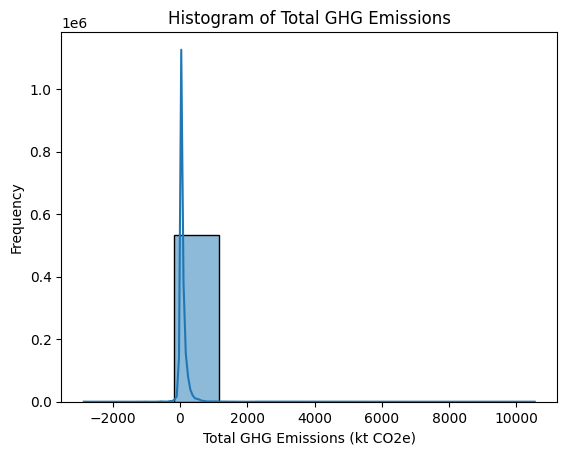

In [7]:
# creating histogram of total emissions
sns.histplot(emissions['Territorial emissions (kt CO2e)'], bins=10, kde=True)
plt.title('Histogram of Total GHG Emissions')
plt.xlabel('Total GHG Emissions (kt CO2e)')
plt.ylabel('Frequency')

We will now create an annual emissions subset to understand annual trends in our data.

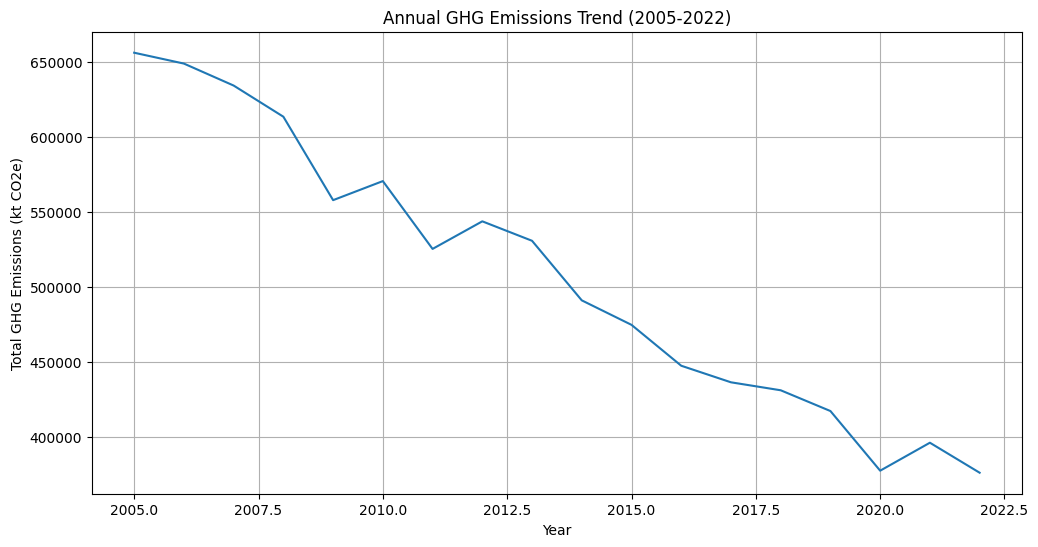

In [8]:
# create annual emissions subset
annual_emissions = emissions.groupby("Calendar Year")["Territorial emissions (kt CO2e)"].sum()
# plot of annual emissions
plt.figure(figsize=(12,6))
plt.plot(annual_emissions.index, annual_emissions.values)
plt.xlabel("Year")
plt.ylabel("Total GHG Emissions (kt CO2e)")
plt.title("Annual GHG Emissions Trend (2005-2022)")
plt.grid(True)
plt.show()

The plot above shows annual greenhouse emissions across the years 2005-2022. We can identify from this plot that total emissions (kt CO2e) are decreasing over the years.

Now a subset to view emissions over time is made.



In [9]:
#create sector emissions over time subset
temporal_sectoral = emissions.groupby(['Calendar Year', 'LA GHG Sector'])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [10]:
# create plot with each sector added as a line, with 2020 marked
def sectorlineplot():
  plt.figure(figsize=(12,6))
  sns.lineplot(data=temporal_sectoral, x='Calendar Year', y='Territorial emissions (kt CO2e)', hue='LA GHG Sector')
  plt.axvline(x=2020, color='black', linestyle='dashed', linewidth=1.5, label="COVID-19 Impact (2020)")
  plt.xlabel('Year')
  plt.ylabel('Total Emissions (kt CO2e)')
  plt.title('Sectoral Emissions Over Time')
  plt.legend(title='Sector', bbox_to_anchor=(1,1))
  plt.show()

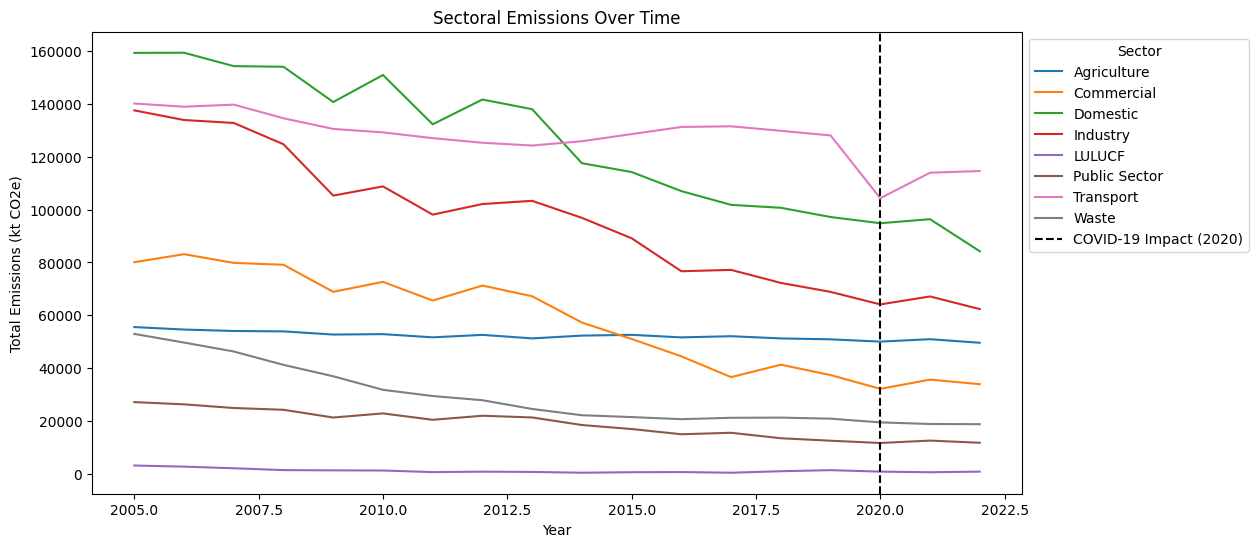

In [11]:
sectorlineplot()

This line graph shows a large decrease in 'Transport' sector emissions in 2020. As a result, we will analyse 'Transport' as our 'most impacted by COVID-19' sector in the data analysis stage.

# Data Wrangling

Firstly, the columns not required for our analysis were dropped.

In [12]:
dropping = [
"CO2 emissions within the scope of influence of LAs (kt CO2)",
"LA GHG Sub-sector",
"Second Tier Authority",
"Country",
"Country Code",
"Region",
"Region Code",
"Local Authority Code",
"Local Authority"
]

emissions_sub = emissions.drop(columns=dropping)

Now that we have our chosen columns for analysis, calculations were performed to normalise our emissions data. Emissions per capita is summed, to help compare emissions regardless of population size when analysing by region.

In [13]:
emissions_sub["Emissions per Capita"] = emissions_sub["Territorial emissions (kt CO2e)"] / (emissions_sub["Mid-year Population (thousands)"] * 1000)

In [14]:
emissions_sub.head()

,Calendar Year,LA GHG Sector,Greenhouse gas,Territorial emissions (kt CO2e),Mid-year Population (thousands),Area (km2),Emissions per Capita
0,2005,Agriculture,CO2,1.678178,90.457,98.3466,1.855222e-05
1,2005,Agriculture,CH4,0.052700,90.457,98.3466,5.825973e-07
2,2005,Agriculture,N2O,0.006770,90.457,98.3466,7.484219e-08
3,2005,Agriculture,CO2,0.311375,90.457,98.3466,3.442249e-06
4,2005,Agriculture,CH4,0.010500,90.457,98.3466,1.160773e-07


As explained earlier, there are very high outliers in the data. A percentile cutoff was used to cap the top 1% of emissions data.

In [15]:
upper_limit = emissions_sub["Territorial emissions (kt CO2e)"].quantile(0.99)  # Top 1%
emissions_clean = emissions_sub[emissions_sub["Territorial emissions (kt CO2e)"] <= upper_limit]

print(emissions_clean["Territorial emissions (kt CO2e)"].describe())

count    527685.000000
mean         11.992412
std          42.279132
min       -2854.921188
25%           0.038500
50%           0.513426
75%           4.886737
max         267.579395
Name: Territorial emissions (kt CO2e), dtype: float64


Finally, the annual emissions, regional temporal and sector temporal subsets were recreated using the clean data. A 'transport' subset was also created due to its significance during visualisation.

In [16]:
annual_emissions2 = emissions_clean.groupby("Calendar Year")["Territorial emissions (kt CO2e)"].sum()
annual_emissions2 = annual_emissions2.reset_index()

In [17]:
temporal_sectoral2 = emissions_clean.groupby(['Calendar Year', 'LA GHG Sector'])['Territorial emissions (kt CO2e)'].sum().reset_index()

In [18]:
transport_emissions = emissions_clean[emissions_clean["LA GHG Sector"] == "Transport"]

In [19]:
transport_ts = transport_emissions.groupby("Calendar Year")["Territorial emissions (kt CO2e)"].sum().reset_index()

# Data Analysis

## Part I: Overall Annual Emissions

Firstly, we will conduct analysis for overall annual emissions. This includes simple moving average, exponential and double exponential smoothing.

**Simple Moving Average**

Simple Moving Average allows for us to identify general patterns in our data, and we can calculate the 3, 5, and 10 year moving averages for overall emissions.

In [20]:
# moving avgs 3,5,10
annual_emissions2["3-Year Avg"] = annual_emissions2["Territorial emissions (kt CO2e)"].rolling(3, min_periods=1).mean()
annual_emissions2["5-Year Avg"] = annual_emissions2["Territorial emissions (kt CO2e)"].rolling(5, min_periods=1).mean()
annual_emissions2["10-Year Avg"] = annual_emissions2["Territorial emissions (kt CO2e)"].rolling(10, min_periods=1).mean()

Our moving averages are plotted as line graphs.

In [21]:
def total_sma():
  plt.figure(figsize=(12, 6))
  plt.plot(annual_emissions2["Calendar Year"], annual_emissions2["Territorial emissions (kt CO2e)"], label="Total GHG Emissions", color="gray", alpha=0.5)
  plt.plot(annual_emissions2["Calendar Year"], annual_emissions2["3-Year Avg"], label="3-Year Avg", linestyle="dashed")
  plt.plot(annual_emissions2["Calendar Year"], annual_emissions2["5-Year Avg"], label="5-Year Avg", linestyle="dashed")
  plt.plot(annual_emissions2["Calendar Year"], annual_emissions2["10-Year Avg"], label="10-Year Avg", linestyle="dotted")
  plt.xlabel("Year")
  plt.ylabel("Total Greenhouse Gas Emissions (kt)")
  plt.title("Moving Averages of GHG Emissions Over Time")
  plt.legend()
  plt.grid(True)
  plt.show()

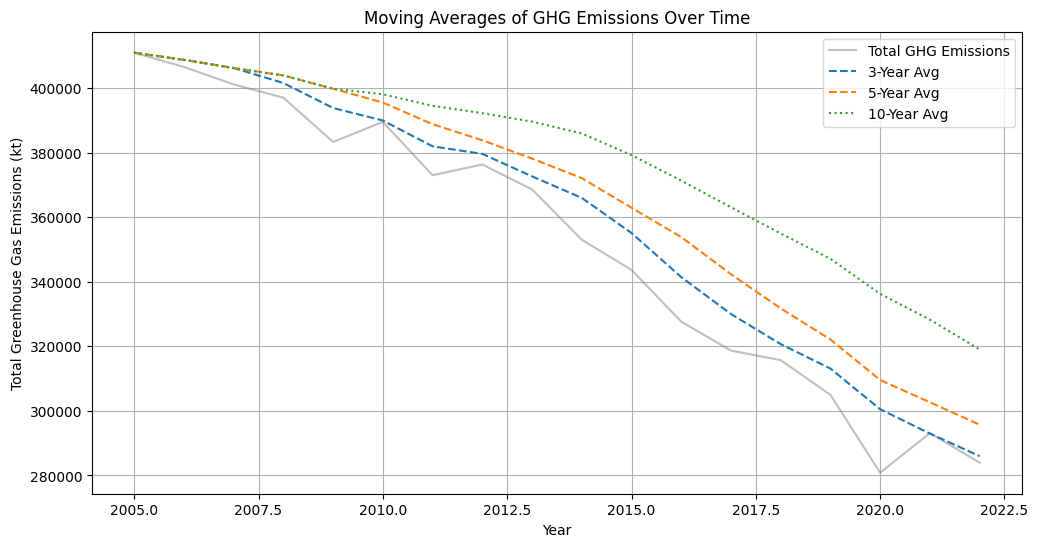

In [22]:
total_sma()

Finally, the RMSE and MAPE are calculated, to quantitatively assess the discrepancies between the moving average values and the actual values.

In [23]:
rmse_3 = np.sqrt(mean_squared_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['3-Year Avg']))
mape_3 = mean_absolute_percentage_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['3-Year Avg'])

rmse_5 = np.sqrt(mean_squared_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['5-Year Avg']))
mape_5 = mean_absolute_percentage_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['5-Year Avg'])

rmse_10 = np.sqrt(mean_squared_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['10-Year Avg']))
mape_10 = mean_absolute_percentage_error(annual_emissions2['Territorial emissions (kt CO2e)'], annual_emissions2['10-Year Avg'])
# Print the results
print(f"3-Year Avg - RMSE: {rmse_3}, MAPE: {mape_3 * 100}%")
print(f"5-Year Avg - RMSE: {rmse_5}, MAPE: {mape_5 * 100}%")
print(f"10-Year Avg - RMSE: {rmse_10}, MAPE: {mape_10 * 100}%")

3-Year Avg - RMSE: 8718.285986732713, MAPE: 2.0525375511822097%
5-Year Avg - RMSE: 15580.635611291671, MAPE: 4.05296748687295%
10-Year Avg - RMSE: 30419.01984463671, MAPE: 7.942447033328931%


**Simple Exponential Smoothing**

Simple Exponential Smoothing is a forecasting method that predicts future values using a weighted average of past observations. First, emissions data is turned into a list and a datetime index is created. These are then joined in an array.

In [24]:
emissions_list = annual_emissions2["Territorial emissions (kt CO2e)"].tolist()
dates = pd.date_range(start="2005", periods=len(emissions_list), freq="Y")
emissions_ESA = pd.Series(emissions_list, index=dates).asfreq('Y')
print(emissions_ESA.head()) # check to see if this has worked

2005-12-31    410957.715207
2006-12-31    406552.703030
2007-12-31    401142.417862
2008-12-31    397040.435924
2009-12-31    383318.104530
Freq: YE-DEC, dtype: float64


<ipython-input-24-9c2032adf1be>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(start="2005", periods=len(emissions_list), freq="Y")
<ipython-input-24-9c2032adf1be>:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  emissions_ESA = pd.Series(emissions_list, index=dates).asfreq('Y')


Now the Exponential Smoothing Averages are calculated, starting with 0.1.

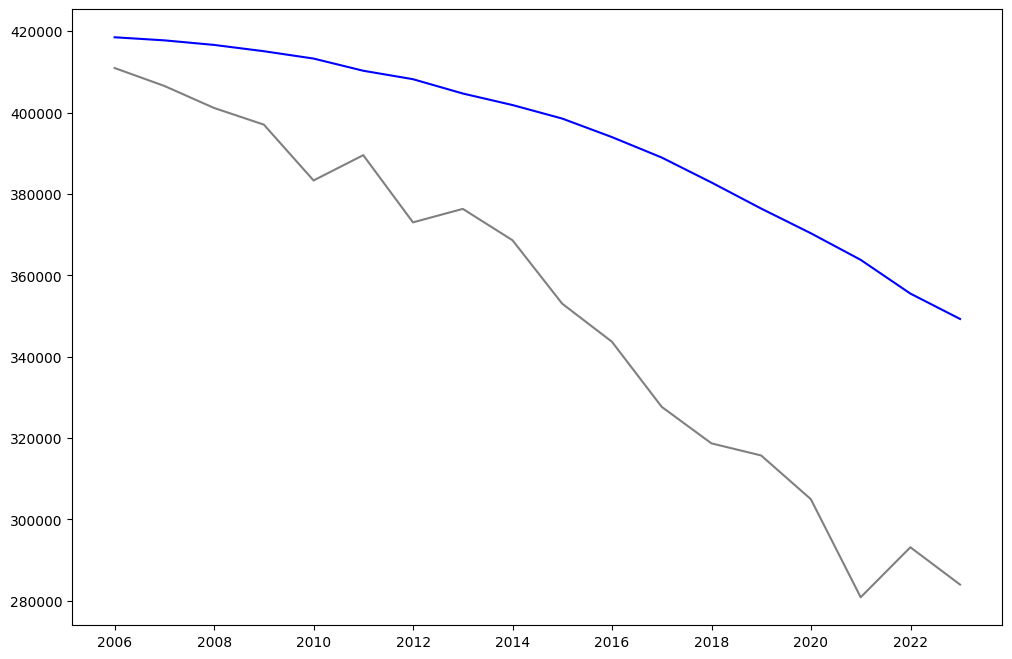

In [25]:
ESAfit1 = SimpleExpSmoothing(emissions_ESA, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False)
plt.figure(figsize=(12, 8))
plt.plot(emissions_ESA,color='gray')
plt.plot(ESAfit1.fittedvalues, color='blue')

Now the first prediction is added using our exponential smoothing model.

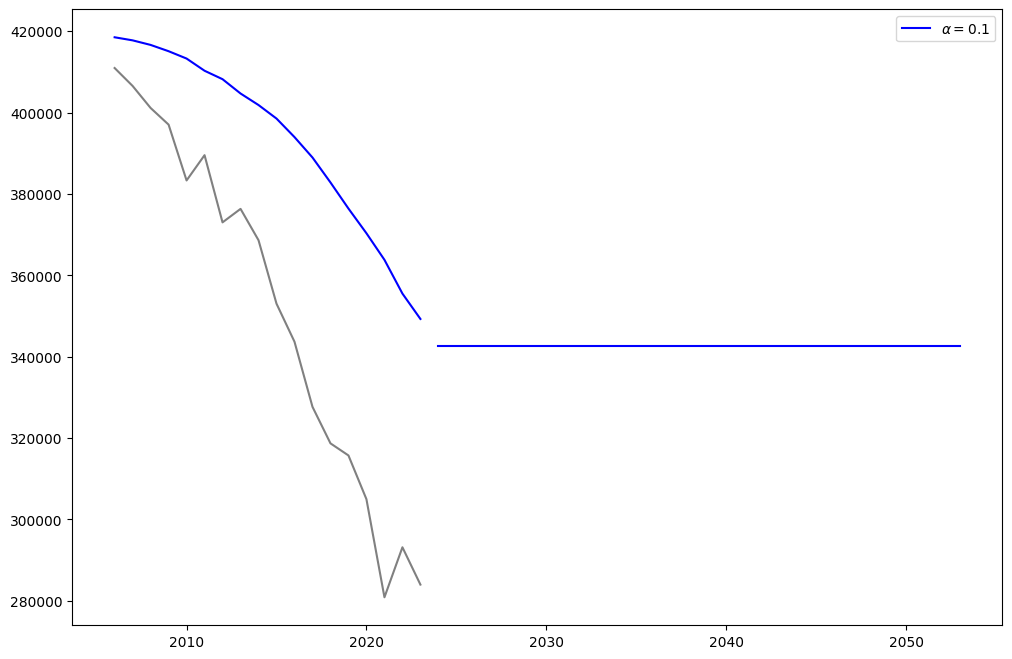

In [26]:
fcast1 = ESAfit1.forecast(30).rename(r'$\alpha=0.1$')
plt.figure(figsize=(12, 8))
plt.plot(emissions_ESA,color='gray')
plt.plot(ESAfit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, color='blue')
plt.legend([line1], [fcast1.name])

Next, other alpha values are tested and plotted to see how they compare.

In [27]:
#fit the model with a smoothing alpha of 0.1
ESAfit1 = SimpleExpSmoothing(emissions_ESA, initialization_method="heuristic").fit(smoothing_level=0.1,optimized=False)

#predict for the next 10 years
fcast1 = ESAfit1.forecast(10).rename(r'$\alpha=0.1$')

#repeat with alpha of 0.5
ESAfit2 = SimpleExpSmoothing(emissions_ESA, initialization_method="heuristic").fit(smoothing_level=0.5,optimized=False)
fcast2 = ESAfit2.forecast(10).rename(r'$\alpha=0.5$')

#repeat with alpha of 0.9
ESAfit3 = SimpleExpSmoothing(emissions_ESA, initialization_method="heuristic").fit(smoothing_level=0.9,optimized=False)
fcast3 = ESAfit2.forecast(10).rename(r'$\alpha=0.9$')


In [28]:
def overall_esa():
  plt.figure(figsize=(12, 8))
  plt.plot(emissions_ESA,color='gray')

  plt.plot(ESAfit1.fittedvalues, color='blue')
  line1, = plt.plot(fcast1, color='blue')
  plt.plot(ESAfit2.fittedvalues, color='orange')
  line2, = plt.plot(fcast2, color='orange')
  plt.plot(ESAfit3.fittedvalues, color='green')
  line3, = plt.plot(fcast3, color='green')
  plt.xlabel("Year")
  plt.ylabel("Total Greenhouse Gas Emissions (kt)")
  plt.title("Simple Exponential Smoothing Prediction GHG Emissions Over Time")
  plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

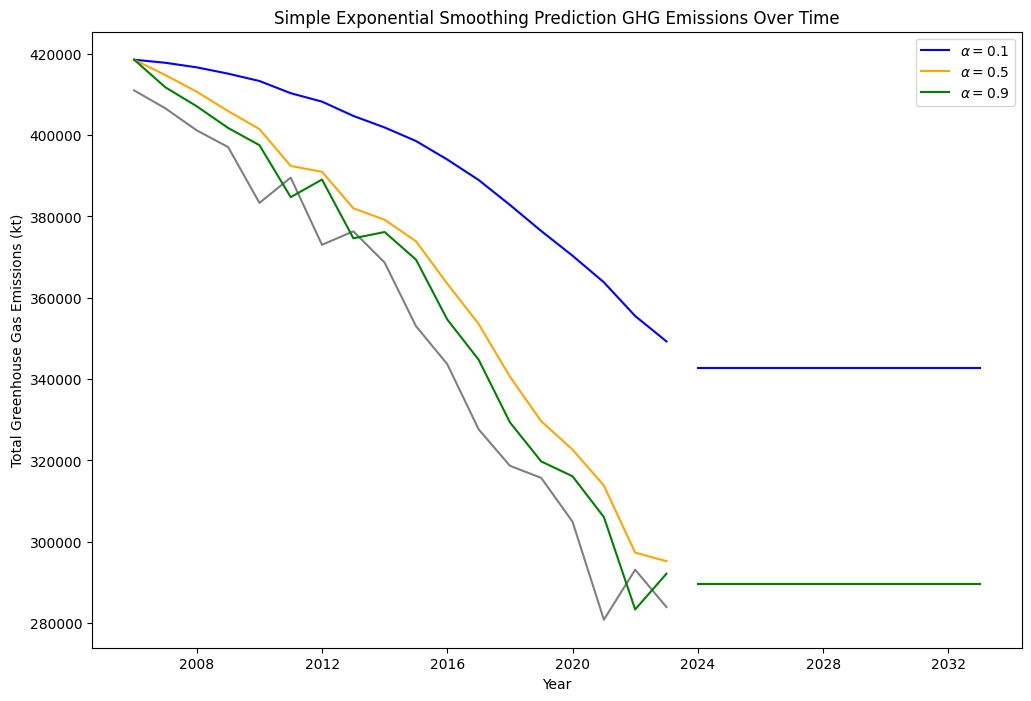

In [29]:
overall_esa()

Finally, the 'optimal' amount of smoothing for the overall emissions data is determined.

In [30]:
ESAfit4 = SimpleExpSmoothing(emissions_ESA, initialization_method="estimated").fit()
fcast4 = ESAfit4.forecast(30).rename(r'$\alpha=%s$'%ESAfit4.model.params['smoothing_level'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [31]:
#plot the data
def optimised_des():
  plt.figure(figsize=(12, 8))
  plt.plot(emissions_ESA,color='gray')
  plt.plot(ESAfit4.fittedvalues, color='green')
  line4, = plt.plot(fcast4, color='green')
  plt.xlabel("Year")
  plt.ylabel("Total Greenhouse Gas Emissions (kt)")
  plt.title("GHG Emissions Optimised Alpha Prediction")
  plt.legend([line4], [fcast4.name])

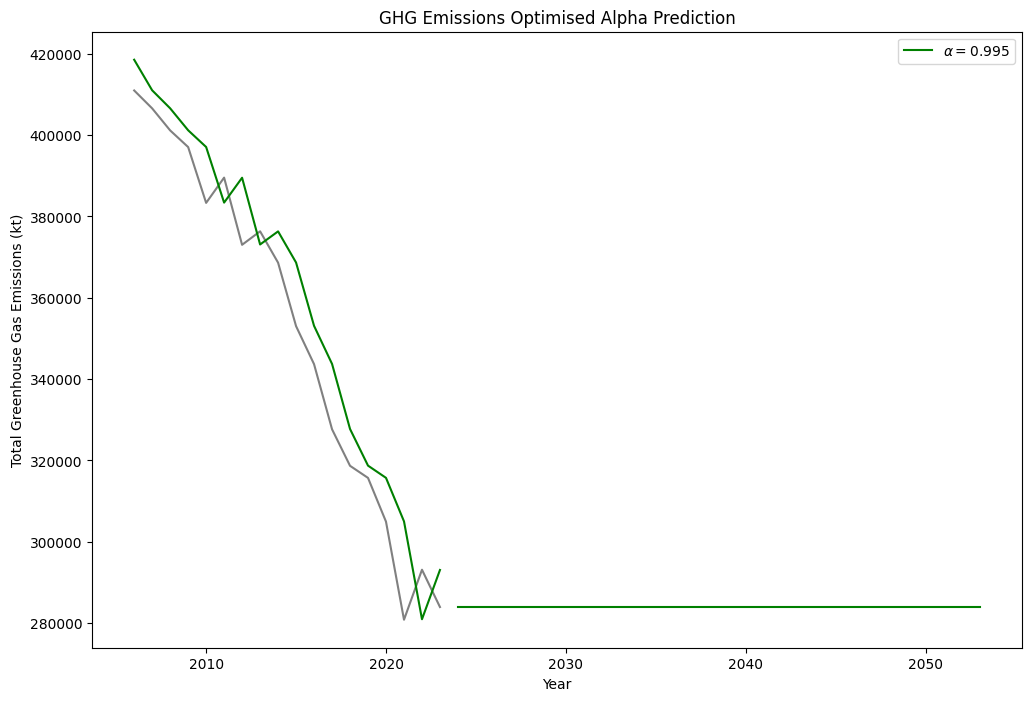

In [32]:
optimised_des()

Our 'optimal' alpha value is 0.995. This will be rounded to 0.9.

**Double Exponential Smoothing**

Double Exponential Smoothing extends our Simple Exponential Smoothing by adding a 'trend' component.

In [33]:
doublefit1 = Holt(emissions_ESA, exponential=True, initialization_method="estimated").fit(smoothing_level=0.9, smoothing_trend=0.2, optimized=False)

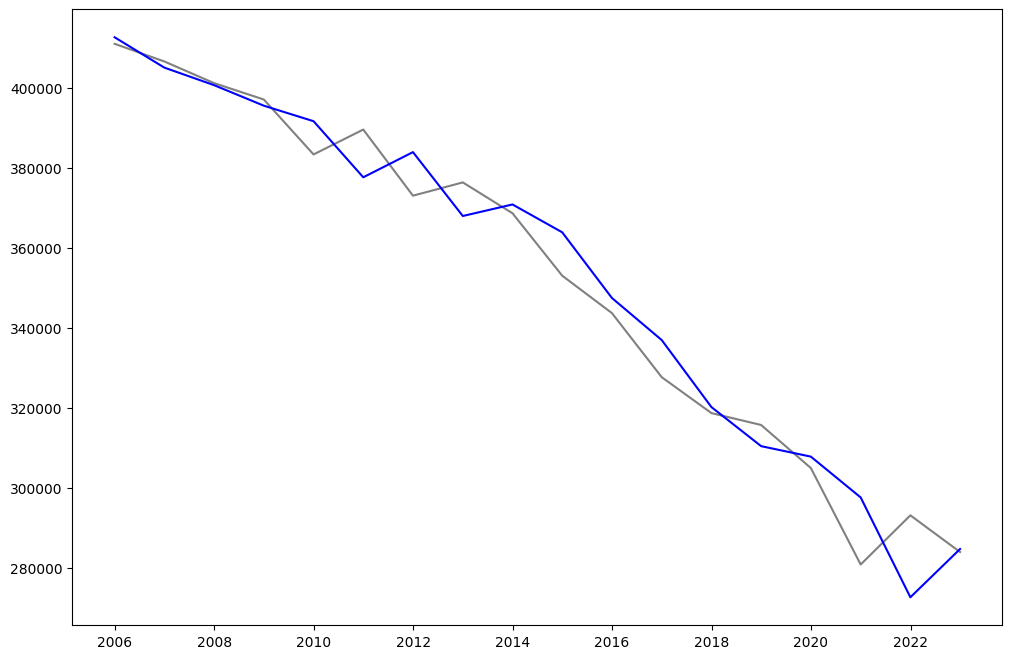

In [34]:
#create a plot
plt.figure(figsize=(12, 8))

#plot the original data in grey
plt.plot(emissions_ESA,color='gray')

#add the double exponentially smoothed data in blue:
plt.plot(doublefit1.fittedvalues, color='blue')

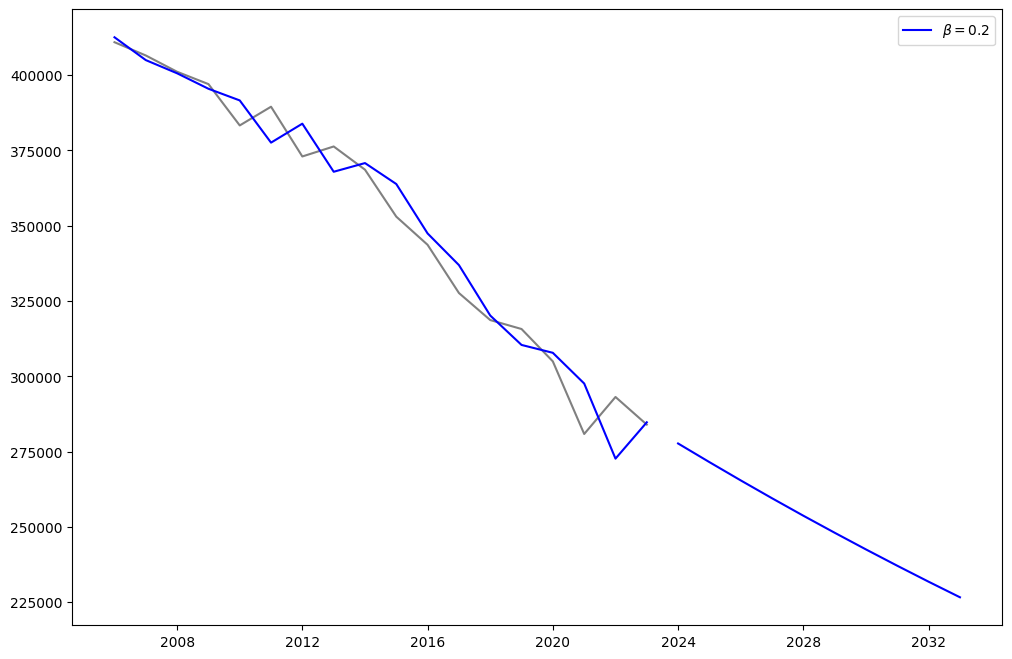

In [35]:
fcast1 = doublefit1.forecast(10).rename(r'$\beta=0.2$')

#create a plot
plt.figure(figsize=(12, 8))

#plot the original data in grey
plt.plot(emissions_ESA,color='gray')

#add the double exponentially smoothed data in blue:
plt.plot(doublefit1.fittedvalues, color='blue')

#add a line with our predicted values
line1, = plt.plot(fcast1, color='blue')

#add a legend, linking line1 to the name
plt.legend([line1], [fcast1.name])

In [36]:
#fit with optimised alpha of 0.1 and beta of 0.2
doublefit1 = Holt(emissions_ESA, exponential=True, initialization_method="estimated").fit(smoothing_level=0.9, smoothing_trend=0.2, optimized=False)
fcast1 = doublefit1.forecast(10).rename(r'$\beta=0.2$')
#fit with beta of 0.5
doublefit2 = Holt(emissions_ESA, exponential=True, initialization_method="estimated").fit(smoothing_level=0.9, smoothing_trend=0.5, optimized=False)
fcast2 = doublefit2.forecast(10).rename(r'$\beta=0.5$')
#fit with beta of 0.8
doublefit3 = Holt(emissions_ESA, exponential=True, initialization_method="estimated").fit(smoothing_level=0.9, smoothing_trend=0.8, optimized=False)
fcast3 = doublefit3.forecast(10).rename(r'$\beta=0.8$')

In [37]:
def overall_des():
  plt.figure(figsize=(12, 8))
  plt.plot(emissions_ESA, color='gray')
  plt.plot(doublefit1.fittedvalues, color='blue')
  line1, = plt.plot(fcast1, color='blue')
  plt.plot(doublefit2.fittedvalues, color='orange')
  line2, = plt.plot(fcast2, color='orange')
  plt.plot(doublefit3.fittedvalues, color='green')
  line3, = plt.plot(fcast3, color='green')
  plt.xlabel("Year")
  plt.ylabel("Territorial Emissions (kt CO2e)")
  plt.title("Double Exponential Smoothing Prediction for Annual Emissions")
  plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

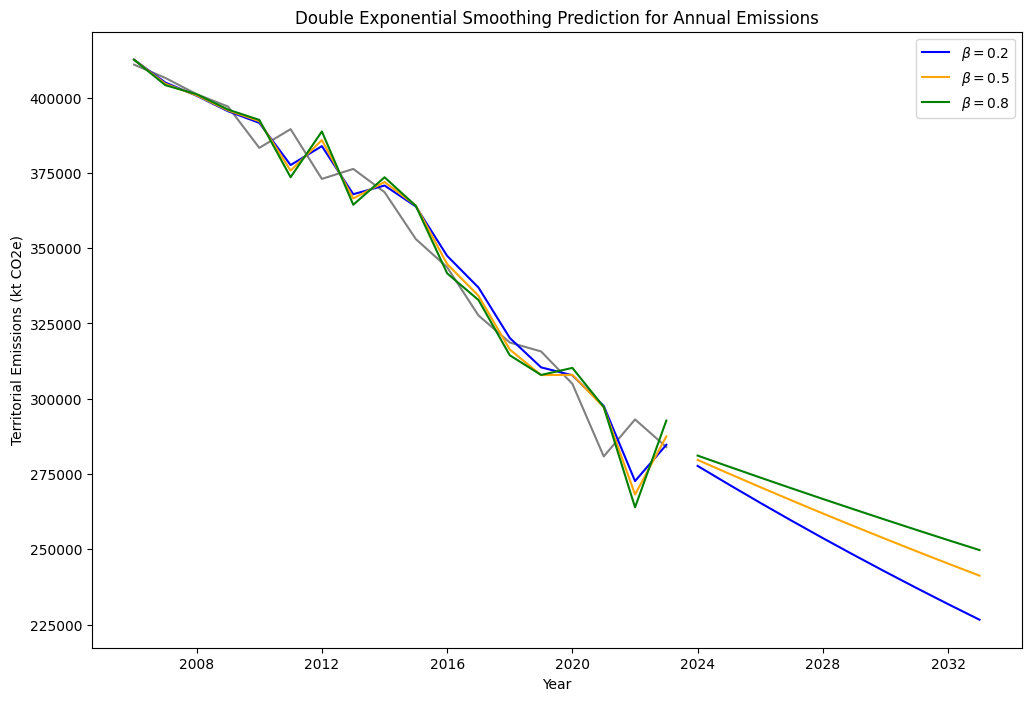

In [38]:
overall_des()

## Part II: Emissions by 'Most Impacted' Sector

As discussed in the 'Statistics & Visualization' chapter, the transport sector was identified as the most impacted by COVID-19. Therefore, this analysis will explore the long-term changes influenced by the pandemic.

**Simple Moving Average**

Moving averages are computed for all sectors, using 3, 5, and 10 year averages, then subsetted into Transport.

In [39]:
#compute moving averages for each sector
temporal_sectoral2['3-Year Avg'] = temporal_sectoral2.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].transform(lambda x: x.rolling(3, min_periods=1).mean())
temporal_sectoral2['5-Year Avg'] = temporal_sectoral2.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].transform(lambda x: x.rolling(5, min_periods=1).mean())
temporal_sectoral2['10-Year Avg'] = temporal_sectoral2.groupby('LA GHG Sector')['Territorial emissions (kt CO2e)'].transform(lambda x: x.rolling(10, min_periods=1).mean())

In [40]:
transport_data = temporal_sectoral2[temporal_sectoral2['LA GHG Sector'] == 'Transport']

Next, a plot with Transport's totals and averages is created.

In [41]:
def transport_sma():
  plt.figure(figsize=(12, 6))
  plt.plot(transport_data["Calendar Year"], transport_data["Territorial emissions (kt CO2e)"], label="Total GHG Emissions", color="gray", alpha=0.5)
  plt.plot(transport_data["Calendar Year"], transport_data["3-Year Avg"], label="3-Year Avg", linestyle="dashed")
  plt.plot(transport_data["Calendar Year"], transport_data["5-Year Avg"], label="5-Year Avg", linestyle="dashed")
  plt.plot(transport_data["Calendar Year"], transport_data["10-Year Avg"], label="10-Year Avg", linestyle="dotted")
  plt.xlabel("Year")
  plt.ylabel("Total Greenhouse Gas Emissions (kt)")
  plt.title("Moving Averages of Transport GHG Emissions Over Time")
  plt.legend()
  plt.grid(True)
  plt.show()

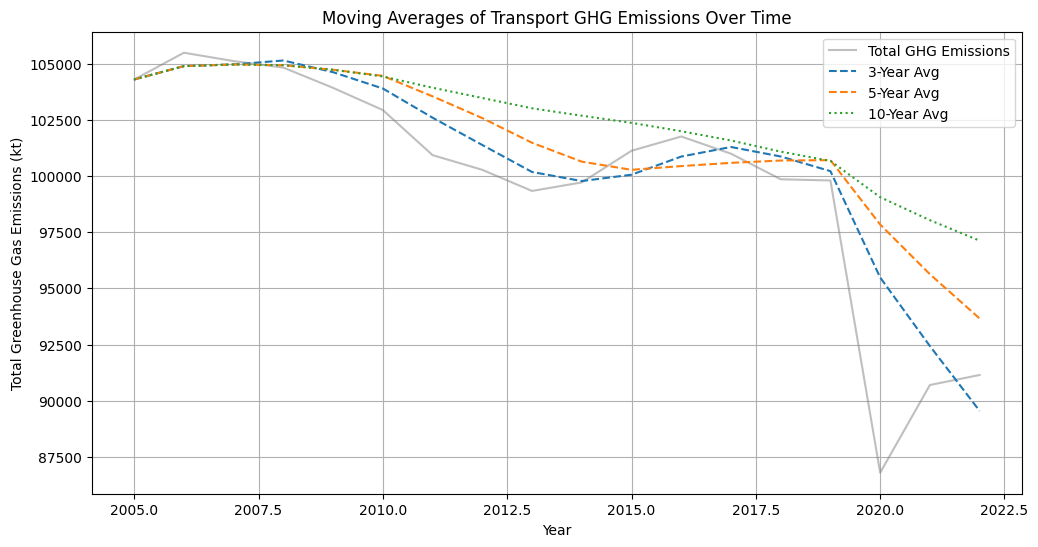

In [42]:
transport_sma()

**Interrupted Time Series**

An Interrupted Time Series analysis helps identify patterns and assess statistical singificance following a  disruption - in this case, COVID-19. This method will be used to evaluate the pandemic's impact on Transport emissions, firstly creating an OLS model and then visualising the Interrupted Time Series.

In [43]:
def transport_ols():
  interrupt_year = 2020

  transport_ts["Time"] = transport_ts["Calendar Year"] - transport_ts["Calendar Year"].min() + 1
  transport_ts["Post_Intervention"] = (transport_ts["Calendar Year"] >= interrupt_year).astype(int)
  transport_ts["Time_After_Intervention"] = transport_ts["Time"] * transport_ts["Post_Intervention"]
  X = transport_ts[["Time", "Post_Intervention", "Time_After_Intervention"]]
  X = sm.add_constant(X)
  y = transport_ts["Territorial emissions (kt CO2e)"]
  model = sm.OLS(y, X).fit()
  transport_ts["Predicted"] = model.predict(X)

  print(model.summary())

In [44]:
transport_ols()

                                   OLS Regression Results                                  
Dep. Variable:     Territorial emissions (kt CO2e)   R-squared:                       0.952
Model:                                         OLS   Adj. R-squared:                  0.942
Method:                              Least Squares   F-statistic:                     92.37
Date:                             Fri, 31 Jan 2025   Prob (F-statistic):           1.83e-09
Time:                                     09:12:37   Log-Likelihood:                -151.91
No. Observations:                               18   AIC:                             311.8
Df Residuals:                                   14   BIC:                             315.4
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                              coef    std err          t      P>|t|      [0.025 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
def transport_its():
  interrupt_year = 2020

  plt.figure(figsize=(10, 6))
  plt.plot(transport_ts["Calendar Year"], transport_ts["Territorial emissions (kt CO2e)"], label="Actual emissions", color="blue")
  plt.plot(transport_ts["Calendar Year"], transport_ts["Predicted"], label="Predicted trend", color="red", linestyle="dashed")

  plt.axvline(x=interrupt_year, color="black", linestyle="--", label="Intervention Year")

  plt.xlabel("Year")
  plt.ylabel("Territorial emissions (kt CO2e)")
  plt.title("Interrupted Time Series Analysis of Transport Emissions")
  plt.legend()
  plt.grid(True)
  plt.show()

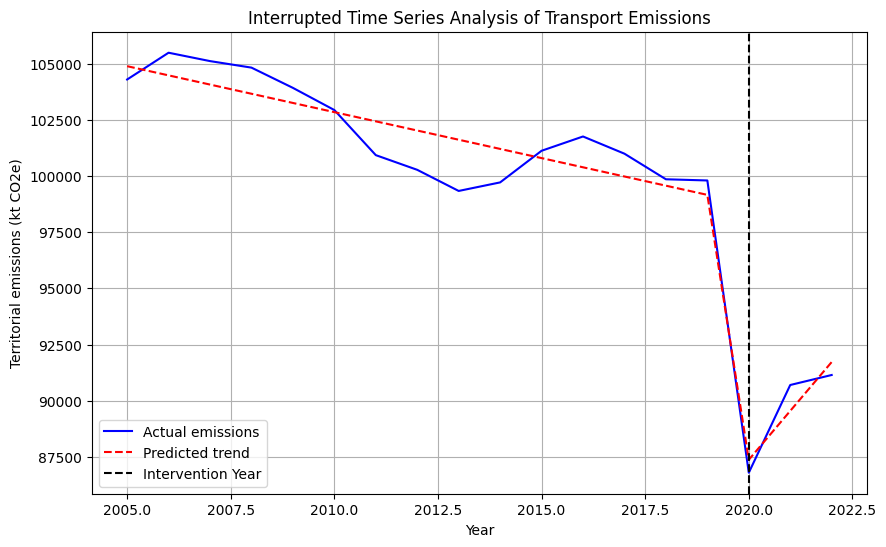

In [46]:
transport_its()

# Results

## Part I: Overall Annual Emissions Results

**Simple Moving Average Results**

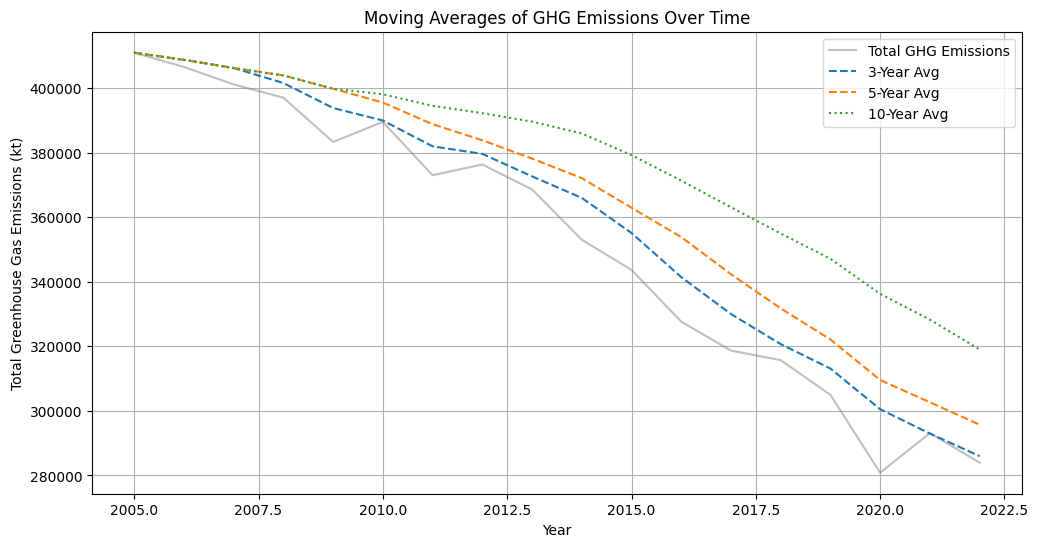

In [47]:
total_sma()

The Simple Moving Average graph shows a downward trend of total greenhouse gas emissions over time. The 3, 5, and 10 year moving averages provide different levels of smoothing. The 10 year moving average presents the stablest trajectory, which indicates the consistent long-term decline in emissions. There is a notable drop observed around 2020, coinciding with the COVID-19 pandemic, however after 2020 the trends suggest a gradual stabilisation. The 3 and 5 year moving averages show a potential rebound from this disruption.

**Simple Exponential Smoothing Results**

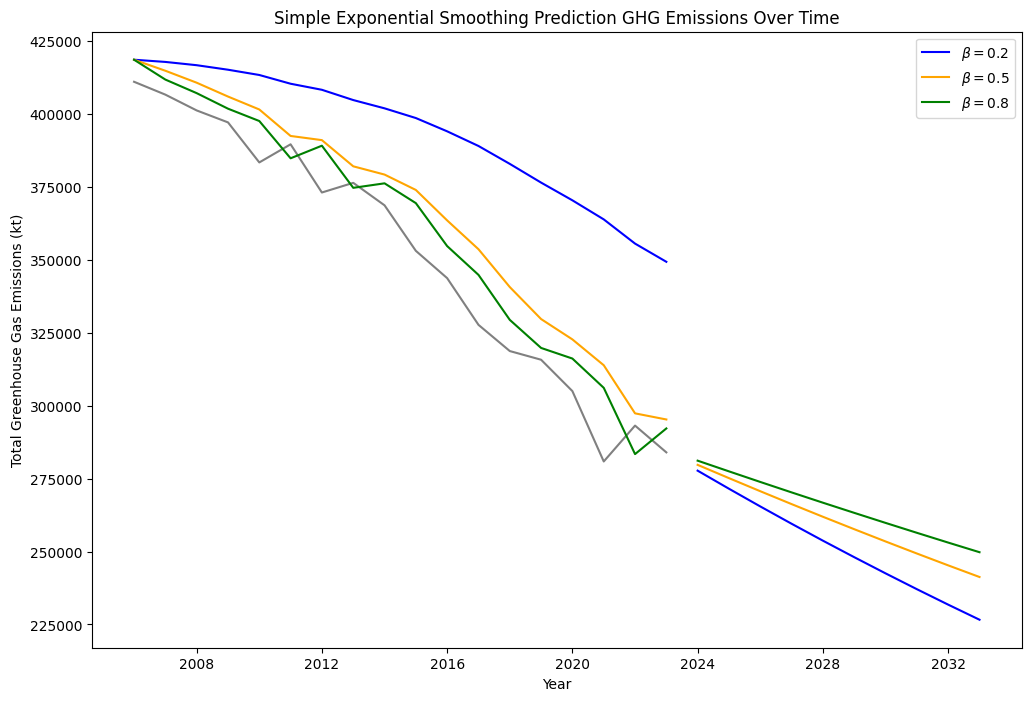

In [48]:
overall_esa()

The Simple Exponential Smoothing Prediction model was fitted using alpha values from Exponential Smoothing Averages. The trend indicates a steady decline in emissions, but past 2022 there is varying rates of continued decline based on smoothing factor. The lower beta value (0.2) predicts a gradual decline, while the higher values show more sensitivity to recent trends.

**Double Exponential Smoothing Results**

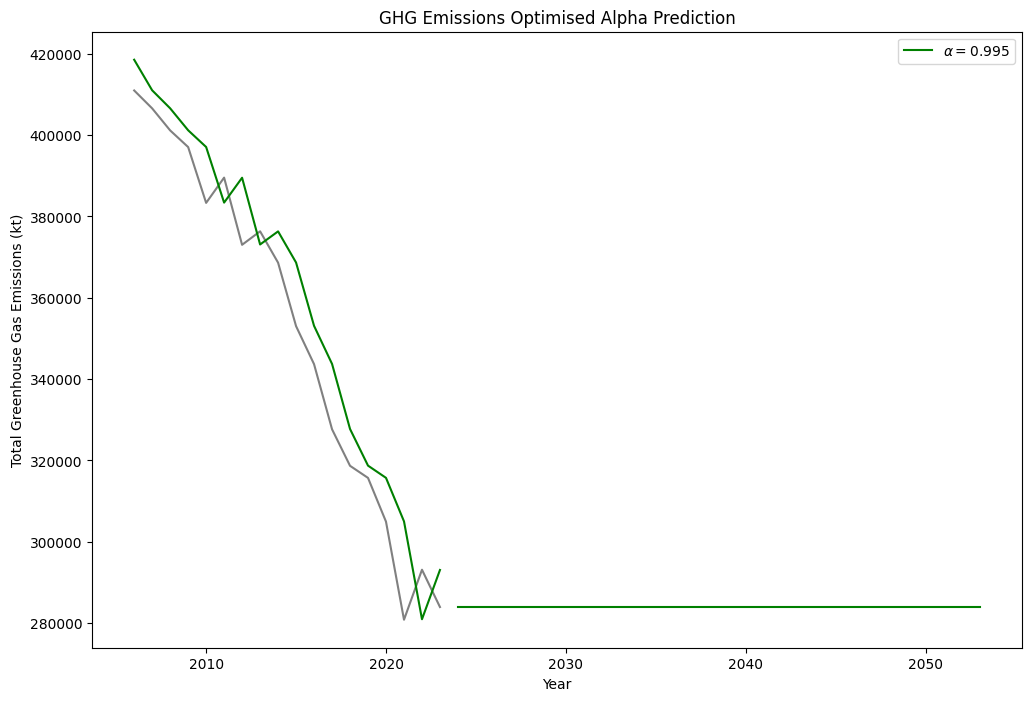

In [49]:
optimised_des()

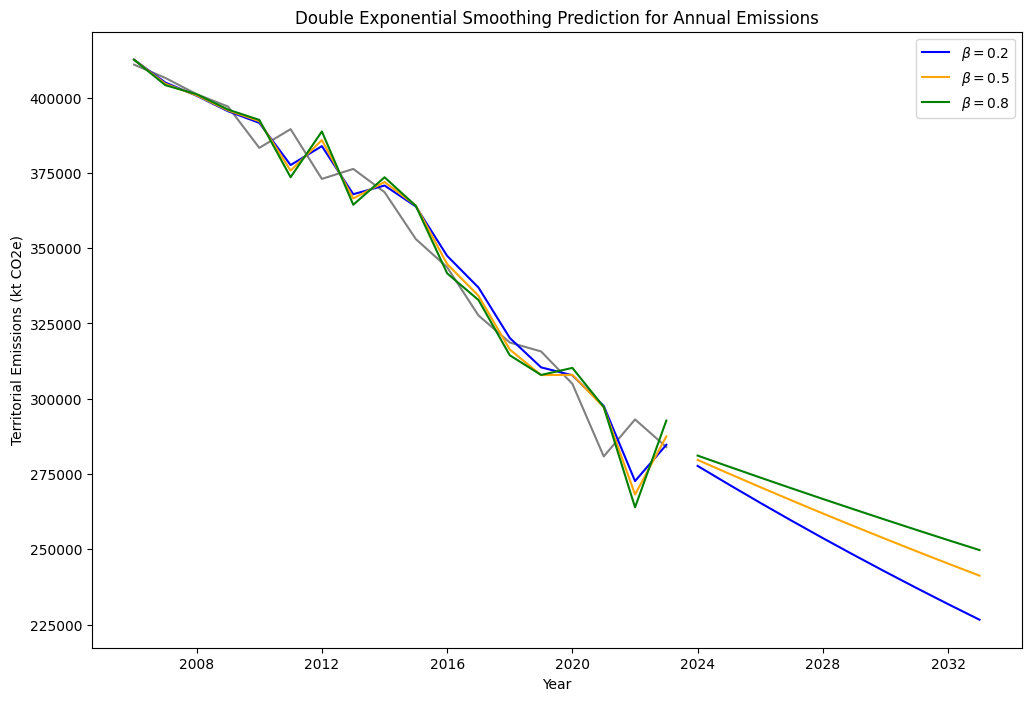

In [50]:
overall_des()

The final Double Exponential Soothing model was fitted using the 'optimised' alpha value created by the Exponential Smoothing Averages. The optimised alpha value was rounded to 0.9, which is very high. The forecasts show continued lower emissions for predicted years, with the rate of decline dependent on beta values. The lower beta (0.2) predicts a steeper decline, while higher beta values predict more gradual declines.  

## Part II: Emissions by 'Most Impacted' Sector Results

**Simple Moving Average Results**

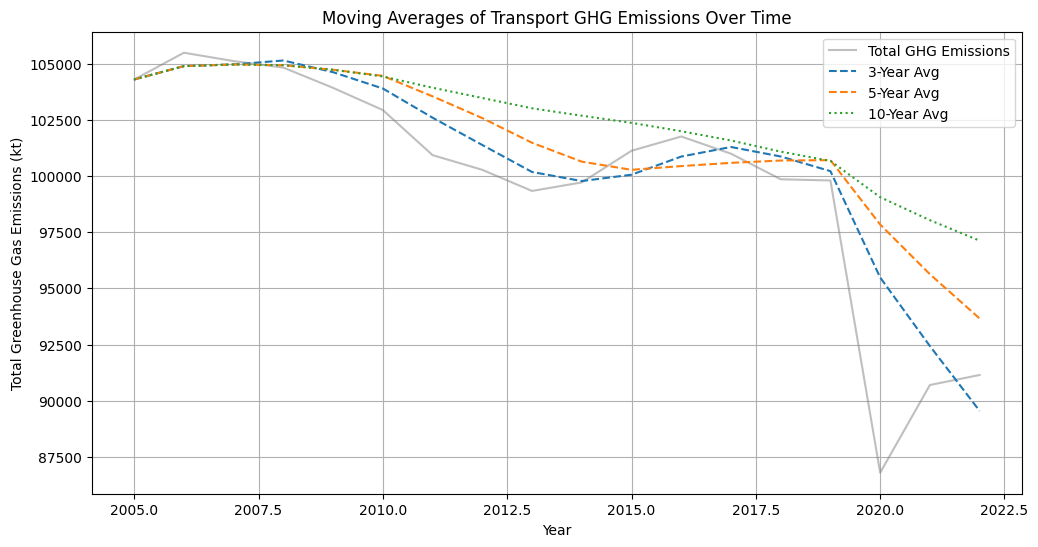

In [51]:
transport_sma()

Transport's greenhouse gas emissions vary between 2005 and 2022, with a sharp decline in 2022. The 3-year moving average reflects more immediate changes, while the 10-year moving average shows the most stable trajectory. There is a reduction across all of the moving averages, which shows a sustained reduction in transport emissions after the sharp decline in 2020.

**Interrupted Time Series Results**

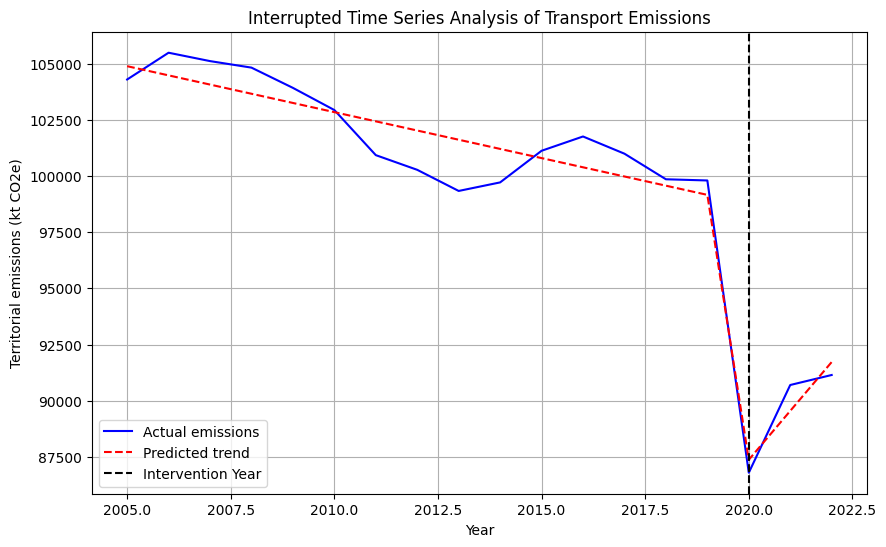

In [52]:
transport_its()

The Interrupted Time Series Analysis graph shows the total transport emissions across 2005 to 2022. The vertical line marks the interruption, on 2020. This is when the UK was impacted by the pandemic and lockdown resrictions. After 2020, emissions slightly rebound but remain below the pre-2020 trajectory.

In [53]:
transport_ols()

                                   OLS Regression Results                                  
Dep. Variable:     Territorial emissions (kt CO2e)   R-squared:                       0.952
Model:                                         OLS   Adj. R-squared:                  0.942
Method:                              Least Squares   F-statistic:                     92.37
Date:                             Fri, 31 Jan 2025   Prob (F-statistic):           1.83e-09
Time:                                     09:13:05   Log-Likelihood:                -151.91
No. Observations:                               18   AIC:                             311.8
Df Residuals:                                   14   BIC:                             315.4
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                              coef    std err          t      P>|t|      [0.025 

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


The OLS regression results show a strong model fit, R-squared of 0.952 (95.2% variance explained). The pre-intervention trend shows a statistically significant decline in emissions over time (-409.39, p < 0.001). Whereas the post-intervention (COVID-19) results in a decrease of 52670kt CO2e (p=0.004). The post-intervention trend change is positive (2585.77, p = 0.012), suggesting a potential resurgence in emissions.

# Discussion

The results tie directly into our research questions, which look at long-term emissions trends and how  events like COVID-19 shape future trends. The Simple Moving Average and Exponential Smoothing models confirm that emissions have been on a general decline, with a sharp drop in 2020 due to lockdowns. However, the fact that emissions have since stabilised suggests that without stronger policy measures, these decreases in emissions might not last. This links with previous research showing that while global emissions fell during the pandemic temporarily, long term decreases require structural changes rather than one-off disruptions (Le Quéré et al., 2021).

A very interesting take away from the results is the difference in trends between total emissions and transport-specific emissions. While overall emissions show signs of rebounding, transport emissions appear to have maintained a more steady decline. The Interrupted Time Series analysis suggests that transport behaviors may have changed in a more lasting way, likely influenced by increased remote work, shifts in commuting patterns, etc.

Looking at our results from a practical view, these results show the need for ongoing policy efforts to prevent emissions from returning to pre-pandemic levels. The pandemic showed that sharp decreases are possible, but the rebound effect makes it clear that temporary changes won't be enough. If policymakers can build on the shifts seen in transport, there's a real opportunity to make lasting progress. Without this, sectors that experienced temporary dips, such as industry and energy, are likely to resume previous emissions patterns.

# Conclusion

This project analysed longitudinal trends in greenhouse gas emissions using temporal and time series analysis, focusing on unpredictable shocks like COVID-19 and how they can influence emission trends. By applying Simple Moving Averages, Simple Exponential Smoothing, Double Exponential Smoothing, and Interrupted Time Series it was found that there was a general decrease in emissions from 2005 to 2022. Transport emissions seems to have had undergone a potentially lasting shift, suggesting long-term impact.  Understanding these trends is essential for shaping future climate change and net-zero policies, and ensuring that temporary reductions translate into meaningful, long-term progress toward emission goals.

# References

Carbon Brief. 2024. *Analysis: UK emissions in 2023 fell to lowest level since 1879.* [Online]. [Accessed 26 January 2024]. Available from: https://www.carbonbrief.org/analysis-uk-emissions-in-2023-fell-to-lowest-level-since-1879/

Department for Business, Energy and Industrial Strategy. 2023. *Annual report and accounts.* (HC1796, 2022-2023. [Online]. London: The Stationery Office.[Accessed 26 January 2025]. Available from: https://www.gov.uk/government/publications/beis-annual-report-and-accounts-2022-to-2023

Department for Energy Security & Net Zero. 2024. 2022 UK Greenhouse Gas Emissions, Final Figures. [Online]. [Accessed 26 January]. Available from: https://assets.publishing.service.gov.uk/media/65c0d15863a23d0013c821e9/2022-final-greenhouse-gas-emissions-statistical-release.pdf

House of Commons Library. 2021. *Decarbonisation: The impact of coronavirus on land transportation*. [Online]. [Accessed 26 January 2024]. Available from: https://researchbriefings.files.parliament.uk/documents/CBP-9266/CBP-9266.pdf

IPCC. 2021. *Climate Change 2021: The Physical Science Basis*. [Online]. [Accessed 26 January 2024]. Available from: https://www.ipcc.ch/report/ar6/wg1/

ONS. 2021. COVID-19 restrictions cut household emissions. [Online]. [Accessed 26 January 2024]. Available from: https://www.ons.gov.uk/economy/environmentalaccounts/articles/covid19restrictionscuthouseholdemissions/2021-09-21

Quere. C. L., Jackson, R., Jones, M., Smith, A., Abernethy, S., Andrew, R., De-Gol, A., Willis, D., Shan, Y., Canadell, J., Friedlingstein, P., Creutzig, F. and Peters, G. 2020. Temporary reduction in daily global CO2 emissions during COVID-19 forced confinement. *Nature Climate Change.* [Online]. **10**, pp. 647-653. [Accessed 26 January 2024]. Available from: https://doi.org/10.1038/s41558-020-0797-x

Smith, L. V., Tarui, N., Yamagata, T. 2021. Assessing the impact of COVID-19 on global fossil fuel consumption and CO2 emissions. *Energy Economics.* [Online]. **97**, pp. 1-19. [Accessed 26 January 2024]. Available from: https://doi.org/10.1016/j.eneco.2021.105170

Ukhurebor, K. E., Aigbe, U. O., Onyancha, R. B., UK-Eghongon, G., Balgoun, V. A., Egielewa, P. E., Ngonso, B. F., Osibote, O. A., Imoisi, S. E., Ndunagu, J. N., Kusuma, H. S., Darmokoesoemo, H. 2022. Greehouse Gas Emission: Perception during the COVID-19 Pandemic. *Biochemistry Research International*. [Online]. **30**, pp. 1-12. [Accessed 26 January 2024]. Available from: https://doi.org/10.1155/2022/6166276

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [56]:
!jupyter nbconvert --to pdf /content/drive/MyDrive/Assessment2_201530247.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Assessment2_201530247.ipynb to pdf
[NbConvertApp] Support files will be in Assessment2_201530247_files/
[NbConvertApp] Making directory ./Assessment2_201530247_files
[NbConvertApp] Writing 118221 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1209825 bytes to /content/drive/MyDrive/Assessment2_201530247.pdf
